# Applied Statistics - Tasks

**Author: Cecilia Pastore**

---

## **Table of content** <a class="anchor" id="Table_of_content"></a>


* [Introduction](#Introduction)
* [Task 1: Permutations and Combinations](#task1)
    * [Conc)
    * [1.2 CO2](#1_2)
        * [1.2.1 CO2 - Bereiter et al. (2014)](#1_2_1)
        * [1.2.2 CO2 - Luthi et al (2008)](#1_2_2)
        * [1.2.3 Comparing the datasets](#1_2_3)
        * [1.2.4 Fusing the dataset on recent years and export on CSV/JASON](#1_2_4)        
    * [1.3 Temprature Anomaly](#1_3)
        * [1.3.1 - Jouzel dataset](#1_3_1)
        * [1.3.2 - NOAA_temperature](#1_3_2)
        * [1.3.3 Comparing the dataset](#1_3_3)
        * [1.3.4 Adding the recent years](#1_3_4)
        * [1.3.5 Fuse the temperature dataset and export to csv/jason](#1_3_5)
    * [1.4 CH4](#1_4)
        * [1.4.1 From 800,000 years before present to 1000](#1_4_1)
        * [1.4.2 From 1000 to 1984](#1_4_2)
        * [1.4.3 From 1984 to 2022](#1_4_3)
        * [1.4.4 Fuse the dataset and export it as CSV and Jason](#1_4_4)
    * [1.5 Fuse the dataset](#1_5)
    * [1.6 CO2/CH4/Temp_anomaly Analysis](#1_6)
        * [1.6.1 CO2](#1_6_1)
        * [1.6.2 Temperature anomaly](#1_6_2)
        * [1.6.3 CH4](#1_6_3)
        * [1.6.4 CO2/CH4/Temp anomality - combined analysis](#1_6_4)
    * [1.7 Prediction](#1_7)
* [Conclusion Part 1: Temperature Anomaly/C02/CH4](#Conclusion1)
* [Part 2: IRISH contest: temperature and rainfall](#part2)
    * [2.1 Import, Manipulate, and Adapt the Rainfall Dataset, and Export as CSV/JSON](#2_1)
    * [2.2 Import, Manipulate, and Adapt the temperature dataset and Export as CSV/JSON](#2_2)
    * [2.3 Fuse the temperature/rainfall dataset and export it as CSV/JSON](#2_3)

    * [2.4 Irish contest analysis](#2_4)
        * [2.4.1 Rainfall/Rainfall anomaly in Ireland](#2_4_1)
        * [2.4.2 Temperature/Temperature anomaly in Ireland](#2_4_2)
        * [2.4.3 Temperature and rainfall in Ireland](#2_4_3)
* [Conclusion On Part 2: Rainfall and temperature in Ireland](#Conclusion2)
* [References](#References)


#### **INTRODUCTION** <a class="anchor" id="Introduction"></a>

The following project has been formulated as Project Number Two for the subject 'Programming for Data Analysis' at Atlantic Technological University, Galway. The project assignment can be reviewed below before delving into the project itself.

### **Task 1: Permutations and Combinations** <a class="anchor" id="task1"></a>

---

**Task assignement**

>Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.
>
>Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.
>
>Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.
>
>Would you accept two errors? Explain.

First, we can import the necessary library.

In [130]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# print in tabulate format 
# https://pypi.org/project/tabulate/
from tabulate import tabulate

We define the variables needed to explore the problem: the total number of cups, the number of cups with milk added first, and the number of cups with tea added first.

In [131]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 6

# Number of cups of tea with tea in first.
no_cups_tea_first = 6

We calculates the number of ways to select six cups (in this case cups with milk first) from a total of twelve using the math.comb formula (https://docs.python.org/3/library/math.html#math.comb).

In [132]:
# Number of ways of selecting four cups from eight.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

924

The code creates a list of labels for cups based on the variable no_cups. The range(no_cups) [[]](https://www.w3schools.com/python/ref_func_range.asp) function generates a sequence of integers from 0 to no_cups - 1, which are then converted into a list. This results in a list of labels with values corresponding to the number of cups, providing a total of no_cups unique labels that can be used in probability calculations.

In [133]:
# The cup labels.
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

The code then does the following:
1. It selects six random labels from a list called labels using [random.sample() []](https://docs.python.org/3/library/random.html#random.sample).
2. It sorts the selected labels in place using the [sort() []](https://www.w3schools.com/python/ref_list_sort.asp) method.
3. Finally, it converts the sorted list of labels into a set [[]](https://docs.python.org/3/tutorial/datastructures.html#sets)

In [134]:
# Select six cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 6)

# Sort, inplace.
labels_milk.sort()

In [135]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{0, 3, 4, 7, 8, 10}

Now that a label of 6 random cups from a group of 12 has been created, the code analyzes and counts the overlaps between combinations of cups and the selected milk labels.

Specifically, the code does the following:

1. **Generate Combinations**: It creates all possible combinations of no_cups_milk_first cups from no_cups using [itertools.combinations() []](https://docs.python.org/3/library/itertools.html).
2. **Calculate Overlaps**: For each combination, it converts both the combination and labels_milk into sets, finds their [intersection []](https://www.w3schools.com/python/ref_set_intersection.aspnp uni), and records the count of overlapping labels in the no_overlaps list.
3. **Count Unique Overlaps**: It uses np.unique()[[]](https://numpy.org/doc/2.0/reference/generated/numpy.unique.html) to count how many times each overlap occurs, providing a summary of the overlap frequencies.

The **output** will be a two-dimensional array, stored in counts, that contains:

1. The first array with the unique overlap counts.
2. The second array with the corresponding counts of how many combinations had each overlap. 

In general, the more often an overlap count appears, the higher the probability of finding that specific number of cups with milk first.

In [136]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
# https://docs.python.org/3/library/itertools.html
combs = list(itertools.combinations(labels, no_cups_milk_first))

In [137]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  # https://www.w3schools.com/python/ref_set_intersection.asp
  overlap = s1.intersection(s2)
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))
  
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Print the results
print(counts)

(array([0, 1, 2, 3, 4, 5, 6]), array([  1,  36, 225, 400, 225,  36,   1], dtype=int64))


A bar chart [[]](https://how2matplotlib.com/how-to-annotate-bars-in-barplot-with-matplotlib.html) is created to visualize the distribution of overlaps between combinations of cups and selected milk labels, illustrating how frequently different overlap counts occur in the data.

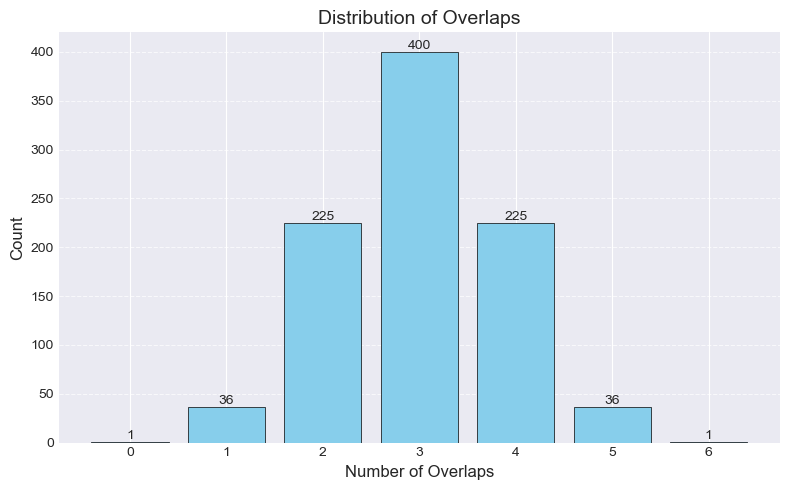

In [138]:
# Plotting the Numberso of possible overlapping
# source: https://how2matplotlib.com/how-to-annotate-bars-in-barplot-with-matplotlib.html


# Create a figure.
fig, ax = plt.subplots(figsize=(8, 5))

# Bar chart with custom colors.
bars = ax.bar(counts[0], counts[1], color='skyblue', edgecolor='black')

# Add percentage labels above the bars.
# https://realpython.com/python-zip-function/
for bar, count in zip(bars, counts[1]):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{count}', ha='center', va='bottom')  # Corrected this line

# Add labels and title.
ax.set_xlabel('Number of Overlaps', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Overlaps', fontsize=14)
ax.set_xticks(counts[0])  # Ensure all x-tick labels are displayed
ax.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal grid lines

# Show the plot.
plt.tight_layout()  # Optimize layout
plt.show()

According to the bar chart, there is only one possibility out of 924 different combinations to select all 6 cups with milk first from a total of 12. To select at least 5 cups with milk first, there are 36 additional combinations, resulting in a total of 37 possibilities. This pattern continues for other overlap counts as well.

We can calculate the probability of selecting at least each number of milk-first cups from 0 to 6, where 0 means no milk-first cups are selected, and 6 means all 6 cups with milk are selected correctly from the group of 12. This probability is derived by dividing the number of successful combinations by the total combinations of 924.

The following code:

1. *Initializes an empty list*, selection_probability, to store the number of overlaps and their probabilities, along with a variable cumulative_overlapping set to 0.

2. *Loops through the counts* of overlaps in reverse [[]](https://www.w3schools.com/python/ref_func_reversed.asp) order:

    - For each overlap count, it updates the cumulative overlap.
    - It calculates the probability of selecting x cups with milk first by dividing the cumulative overlaps by the total number of combinations (ways).
    - It appends the result to the selection_probability list.

3. *Prepares the data* for tabulation [[]]( https://pypi.org/project/tabulate/) [[]](https://www.geeksforgeeks.org/printing-lists-as-tabular-data-in-python/) to display the cumulative probabilities more clearly using the tabulate function.

In [139]:
# Calculate cumulative probabilities for each number of cups with milk to be randomly selected 

# Initialize an array to store the number of overlaps and their probabilities
selection_probability = []
cumulative_overlapping = 0
number_of_cups = 6

# Calculate probabilities and store results in reverse order
# Source: https://www.w3schools.com/python/ref_func_reversed.asp
for i in reversed(counts[1]):  # Loop through the array in reverse
    cumulative_overlapping += i  # Update cumulative overlap count
    probability_cups_with_milk = cumulative_overlapping / ways  # Calculate probability
    selection_probability.append((number_of_cups, cumulative_overlapping, probability_cups_with_milk))  # Store as a tuple (count, probability)
    number_of_cups -= 1  # Decrease the cup count

# using tabulate to print the result in a readable format 
# https://pypi.org/project/tabulate/
# https://www.geeksforgeeks.org/printing-lists-as-tabular-data-in-python/

# Prepare data for tabulate
headers = ["Number of Cups", "Cumulative Overlaps", "Probability (%)"]
table = [(num_cups, cum_overlaps, f"{prob * 100:.2f}") for num_cups, cum_overlaps, prob in selection_probability]

# Print the results using tabulate
print(tabulate(table, headers=headers, tablefmt="rst"))


================  =====================  =================
  Number of Cups    Cumulative Overlaps    Probability (%)
================  =====================  =================
               6                      1               0.11
               5                     37               4
               4                    262              28.35
               3                    662              71.65
               2                    887              96
               1                    923              99.89
               0                    924             100
================  =====================  =================


As shown in the results, there is only a 0.11% chance of randomly selecting all 6 cups with milk first from a group of 12, without any specific capacity. However, if we allow for a possible error of 1, the probability of selecting at least 5 cups with milk first increases to around 4%. When considering the possibility of selecting at least 4 cups with milk first, the probability rises to 28.34%, providing a reasonable chance that a user, without any specific capacities, would mark this assumption as true.

We can visulalize the result for a better understanding. 

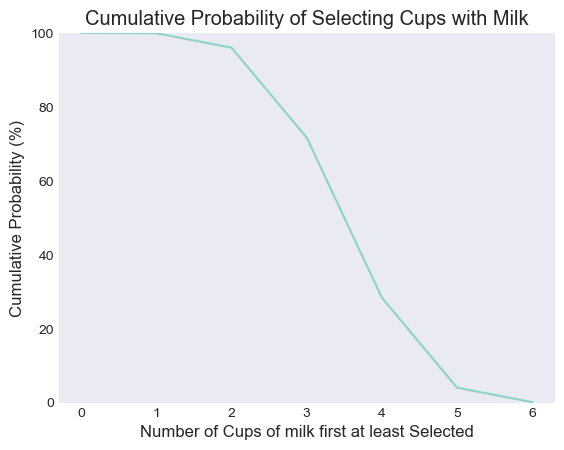

In [140]:
# Unpack the selection_probability list into separate lists
num_cups_list, cumulative_overlaps, probabilities = zip(*selection_probability)

# Convert probabilities to percentages for display purposes only (do not use for plotting)
probabilities_percentage = [prob * 100 for prob in probabilities]

# Plotting
plt.plot(num_cups_list, probabilities_percentage)
plt.title('Cumulative Probability of Selecting Cups with Milk')
plt.xlabel('Number of Cups of milk first at least Selected')
plt.ylabel('Cumulative Probability (%)')  # Update the ylabel to indicate percentage
plt.xticks(num_cups_list)  # Set x-ticks to the number of cups
plt.grid()
plt.ylim(0, 100)  # Set y-axis limits to show percentage range
plt.show()


##### **Conclusion**


**1. Hypothesis: We accept the claim of a special ability if the user can accurately identify which of cups in the experiment had milk added first**

Considering the scenario where a user guesses, there is only a 0.11% probability of correctly identifying all 6 cups with milk first in a group of 12 (6 with milk first and 6 with tea first). If the user successfully identifies all 6 cups, we can confidently reject the null hypothesis that the person has no special ability to discern whether milk or tea was added first.

**2. Hypothesis: We accept the claim of a special ability if the user can accurately identify at least 5 out of 6 cups with milk first in a group of 12 cups.**

If we allow for one error in our hypothesis testing, the probability of guessing 5 or more cups correctly increases to about 4%. In many scientific fields, a common significance threshold is set at [0.05 (or 5%)[]](https://www.scribbr.com/statistics/type-i-and-type-ii-errors/), indicating that a 5% chance of making a Type I error (rejecting a true null hypothesis) is generally considered acceptable.

*Therefore, I am inclined to reject the null hypothesis if the user correctly selects at least 5 cups with milk first out of the 6 in a total of 12 cups, as this would provide sufficient evidence to support the claim of a special ability*.

### **Task 2: numpy's Normal Distribution** <a class="anchor" id="task1"></a>

---

**Task assignement**

>In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.
>
>Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output.
>
>Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal

In [174]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels. api as sm

https://www.learningaboutelectronics.com/Articles/How-to-change-the-transparency-of-a-graph-plot-in-matplotlib-with-Python.php#:~:text=Matplotlib%20allows%20you%20to%20adjust%20the%20transparency%20of,then%20you%20can%20make%20alpha%20greater%20than%201.


In [ ]:
# Set the random seed for reproducibility
np.random.seed(100)

# Define the parameters of the normal distribution
mu, sigma = 10.0, 0.3  # Mean (mu) and standard deviation (sigma)

# Generate a random sample of size 5000 from the normal distribution
s = np.random.normal(mu, sigma, 5000)

Calculated Mean (mu_s): 10.00260493840827
Calculated Standard Deviation (sigma_s): 0.3052313557994557


https://numpy.org/doc/stable/reference/generated/numpy.mean.html
https://numpy.org/doc/stable/reference/generated/numpy.std.html

In [ ]:
# Calculate the mean and standard deviation of the generated sample
mu_s = np.mean(s) 
sigma_s = np.std(s)  

# Print the rounded values to verify they are close to mu and sigma with a round to 2 decimal
print("Calculated Mean (mu_s):", round(mu_s,2))
print("Calculated Standard Deviation (sigma_s):", round(sigma_s,2))

Calculated Mean (mu_s): 10.0
Calculated Standard Deviation (sigma_s): 0.31


In [181]:
# Create an array of x values for plotting the PDF that is centered around the mean (mu) and extends to 4 * standard deviations in both directions
x = np.linspace(mu_s - 4*sigma_s, mu_s + 4*sigma_s, 5000)

# PDF function for the normal distribution
def f(x, mu, sigma):
    # Calculate the normalization constant for the normal distribution
    norm = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
    
    # Calculate the probability density function (PDF) value at each x using the formula for the normal distribution
    return norm * np.exp(-(x - mu)**2 / (2.0 * sigma**2))

# Get y values for the PDF using the defined function
pdf = f(x, mu, sigma)

In [182]:
# Define a function that take the data s, the array of value x and the PDF function plot a graph
def plot_normal_distribution(s, x, pdf, col_hist, col_pdf, title):
    
    # set up the style 
    plt.style.use('seaborn-v0_8-darkgrid')

    # Create a new figure with specified size
    plt.figure(figsize=(12, 6))

    # Histogram of the sample with a slight transparency
    plt.hist(s, bins=50, density=True, alpha=0.3, color=col_hist, edgecolor='black', label='Sample Histogram')

    # Plotting the normal distribution PDF
    plt.plot(x, pdf, color=col_pdf, linewidth=3, label='Normal Distribution PDF')

    # Set the title and axis labels
    plt.title(f'Histogram with PDF {title}', fontsize=16)
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Density', fontsize=14)

    # Add a legend to the plot
    plt.legend(fontsize=12)

    # Enable a grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Draw a vertical line for the mean'mu'
    plt.axvline(mu, color='green', linestyle='--', label='Mean', linewidth=2)

    # Display the plot
    plt.show()

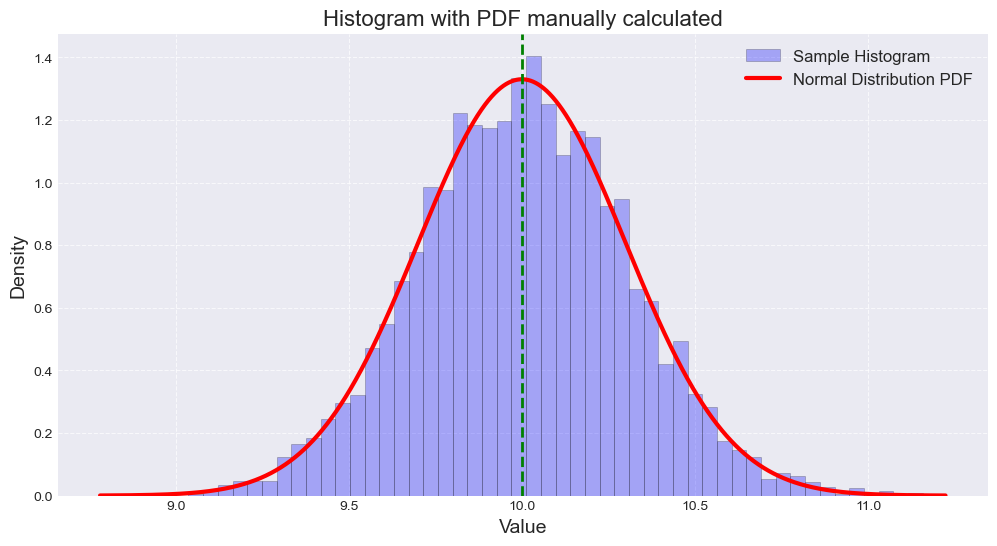

In [183]:
# Call the function to plot
plot_normal_distribution(s, x, pdf, "blue", "red", title="manually calculated")

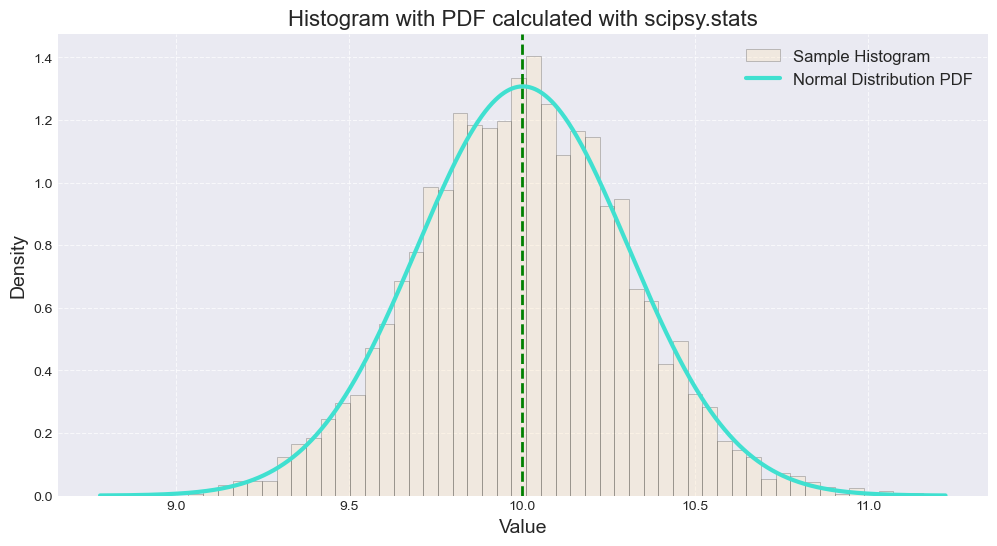

In [184]:
# same with scipsy stat norm pdf function 
# https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/

# Calculate the PDF using scipy's norm function
pdf = stats.norm.pdf(x, mu_s, sigma_s)

# Call the function to plot
plot_normal_distribution(s, x, pdf, "moccasin", "turquoise", title="calculated with scipsy.stats")


In [185]:
# perfom the shapiro test 
# https://www.statology.org/shapiro-wilk-test-python/

# Perform the Shapiro-Wilk test
shapiro_stat, p_value = stats.shapiro(s)

print(f'Shapiro-Wilk Test Statistic: {shapiro_stat:.4f}')
print(f'P-value: {p_value:.4f}')

# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: the data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: the data may be normally distributed.")

Shapiro-Wilk Test Statistic: 0.9993
P-value: 0.0358
Reject the null hypothesis: the data is not normally distributed.


In [186]:
# https://medium.com/@ricardojaviermartnezsustegui/kolmog%C3%B3rov-smirnov-test-in-python-step-by-step-1b7532021bd2
# Perform the Kolmogorov-Smirnov test for normality
ks_statistic, p_value = stats.kstest(s, 'norm', args=(mu_s, sigma_s))

# Output the results
print(f"KS Statistic: {ks_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: the data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: the data may be normally distributed.")


KS Statistic: 0.0076
P-value: 0.9348
Fail to reject the null hypothesis: the data may be normally distributed.
